# Python Packages used to answer questions

In [13]:
!pip install stemgraphic

     |████████████████████████████████| 71kB 6.2MB/s 


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as s
import scipy
import stemgraphic

# Exercise 14

## Importing data

In [3]:
#Creating dict as shown by the author
dict_data = {'time':[30,
                      32,
                      33,
                      35,
                      38,
                      40,
                      42,
                      43,
                      45,
                      50],
              'number_of_days':[4,
                            7,
                            10,
                            12,
                            18,
                            22,
                            20,
                            15,
                            8,
                            4]}

#Creating dframe based on dict_data
dframe = pd.DataFrame(dict_data)

In [6]:
dframe.to_csv('exercicio_14.csv', index=False)

## Answer for 14 - A

In [ ]:
#A
print("Mean for 'time' was {} minutes".format(dframe.mean()['time']))
print("Mean for 'number_of_days' was {} days".format(dframe.mean()['number_of_days']))
print("Median for 'time' was {}.".format(dframe.median()['time']))
print("Median for 'number_of_days' was {}.".format(dframe.median()['number_of_days']))

Mean for 'time' was 38.8 minutes
Mean for 'number_of_days' was 12.0 days
Median for 'time' was 39.0.
Median for 'number_of_days' was 11.0.


In [ ]:
#A - Mode for time
dframe.groupby('time', as_index=False)['number_of_days'].count()

,time,number_of_days
0,30,1
1,32,1
2,33,1
3,35,1
4,38,1
5,40,1
6,42,1
7,43,1
8,45,1
9,50,1


In [ ]:
#A - Mode for time - result
dframe.mode()['time']

0    30
1    32
2    33
3    35
4    38
5    40
6    42
7    43
8    45
9    50
Name: time, dtype: int64

In [ ]:
#A - Mode for number_of_days
dframe.groupby('number_of_days', as_index=False)['time'].count()

,number_of_days,time
0,4,2
1,7,1
2,8,1
3,10,1
4,12,1
5,15,1
6,18,1
7,20,1
8,22,1


In [ ]:
#A - Mode for number_of_days - result
dframe.mode()['number_of_days'][dframe.mode()['number_of_days'].notnull()]

0    4.0
Name: number_of_days, dtype: float64

## Answer for 14 - B

In [ ]:
dict_final = {}
#Quantiles for time
q1_time = dframe.time.quantile([0.25,0.5,0.75]).to_frame().loc[0.25]['time']
q3_time = dframe.time.quantile([0.25,0.5,0.75]).to_frame().loc[0.75]['time']


#Quantiles for number_of_days
q1_number_of_days = dframe.number_of_days.quantile([0.25,0.5,0.75]).to_frame().loc[0.25]['number_of_days']
q3_number_of_days = dframe.number_of_days.quantile([0.25,0.5,0.75]).to_frame().loc[0.75]['number_of_days']

#Decile 4 for time
d4_time = dframe.time.quantile([0.4]).to_frame().loc[0.4]['time']

#Decile 4 for number_of_days
d4_number_of_days = dframe.number_of_days.quantile([0.4]).to_frame().loc[0.4]['number_of_days']

#P61 and P84 for time
p61_time = dframe.time.quantile([0.61]).to_frame().loc[0.61]['time']
p84_time = dframe.time.quantile([0.84]).to_frame().loc[0.84]['time']

#P61 and P84 for number_of_days
p61_number_of_days = dframe.number_of_days.quantile([0.61]).to_frame().loc[0.61]['number_of_days']
p84_number_of_days = dframe.number_of_days.quantile([0.84]).to_frame().loc[0.84]['number_of_days']

#Populating dict to print one-time answer
dict_final['q1_time'] = q1_time
dict_final['q3_time'] = q3_time
dict_final['q1_number_of_days'] = q1_number_of_days
dict_final['q3_number_of_days'] = q3_number_of_days
dict_final['d4_time'] = d4_time
dict_final['d4_number_of_days']=d4_number_of_days
dict_final['p61_time']=p61_time
dict_final['p84_time']=p84_time
dict_final['p61_number_of_days']=p61_number_of_days
dict_final['p84_number_of_days']=p84_number_of_days

In [ ]:
dict_final

{'d4_number_of_days': 9.2,
 'd4_time': 36.8,
 'p61_number_of_days': 13.47,
 'p61_time': 40.980000000000004,
 'p84_number_of_days': 19.119999999999997,
 'p84_time': 44.12,
 'q1_number_of_days': 7.25,
 'q1_time': 33.5,
 'q3_number_of_days': 17.25,
 'q3_time': 42.75}

## Answer for 14 - C

Text(0.5, 1.0, 'Histogram - Time')

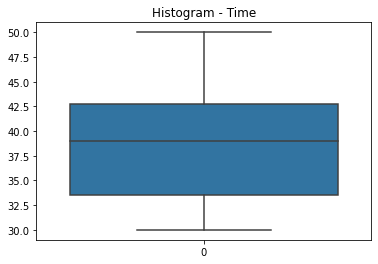

In [ ]:
sns.boxplot(data=dframe['time'])
plt.title('Histogram - Time')

Text(0.5, 1.0, 'Histogram - Number of Days')

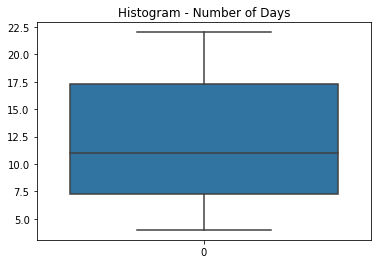

In [ ]:
sns.boxplot(data=dframe['number_of_days'])
plt.title('Histogram - Number of Days')

There are no outliers.

## Answer for 14 - D

In [ ]:
#Amplitude
dict_14d = {}
amplitude_time = dframe.describe()['time'].loc['max']-dframe.describe()['time'].loc['min']
amplitude_number_of_days = dframe.describe()['number_of_days'].loc['max']-dframe.describe()['number_of_days'].loc['min']

dict_14d['amplitude_time']=amplitude_time
dict_14d['amplitude_number_of_days']=amplitude_number_of_days

In [ ]:
#Variance
variance_time = s.variance(dframe['time'])
variance_number_of_days = s.variance(dframe['number_of_days'])

dict_14d['variance_time']=variance_time
dict_14d['variance_number_of_days'] =variance_number_of_days

In [ ]:
#Standard Error
standard_error_time = scipy.stats.sem(dframe['time'])
standard_error_number_of_days = scipy.stats.sem(dframe['number_of_days'])
dict_14d['standard_error_time']=standard_error_time
dict_14d['standard_error_number_of_days']=standard_error_number_of_days

In [ ]:
#Standard Deviation
std_deviation_time = s.stdev(dframe['time'])
std_deviation_number_of_days = s.stdev(dframe['number_of_days'])
dict_14d['std_deviation_time']=std_deviation_time
dict_14d['std_deviation_number_of_days']=std_deviation_number_of_days

In [ ]:
dict_14d

{'amplitude_number_of_days': 18.0,
 'amplitude_time': 20.0,
 'standard_error_number_of_days': 2.0602049520483257,
 'standard_error_time': 2.0154955277107964,
 'std_deviation_number_of_days': 6.5149400952306875,
 'std_deviation_time': 6.37355648144913,
 'variance_number_of_days': 42.44444444444444,
 'variance_time': 40.62222222222222}

## Answer for 14 - E

In [ ]:
dict_14e = {}
#Kurtosis
kurtosis_time = scipy.stats.kurtosis(dframe['time'])
kurtosis_number_of_days = scipy.stats.kurtosis(dframe['number_of_days'])

#Skewness
skew_time = scipy.stats.skew(dframe['time'])
skew_number_of_days = scipy.stats.skew(dframe['number_of_days'])

#Dict
dict_14e['kurtosis_time']=kurtosis_time
dict_14e['kurtosis_number_of_days']=kurtosis_number_of_days
dict_14e['skew_time']=skew_time
dict_14e['skew_number_of_days']=skew_number_of_days

In [ ]:
dict_14e

{'kurtosis_number_of_days': -1.316795043995505,
 'kurtosis_time': -0.972025243118233,
 'skew_number_of_days': 0.22617584038139152,
 'skew_time': 0.228644273088635}

---
Distribution is assymetric positive (right) for both variables ('time','number_of_days'), skew > 0.

The curves are platykurtic for both variables ('time', 'number_of_days'), kurtosis < 0.

---



## Answer for 14 - F

Text(0, 0.5, 'Number of Days')

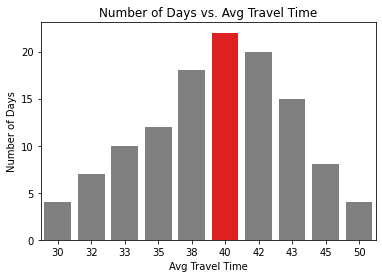

In [ ]:
#Barchart
clrs = ['grey' if (x < max(dframe['number_of_days'])) else 'red' for x in dframe['number_of_days'] ]
sns.barplot(x='time', y='number_of_days', data=dframe, palette=clrs)
plt.title('Number of Days vs. Avg Travel Time')
plt.xlabel('Avg Travel Time')
plt.ylabel('Number of Days')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BoxPlot - Time')

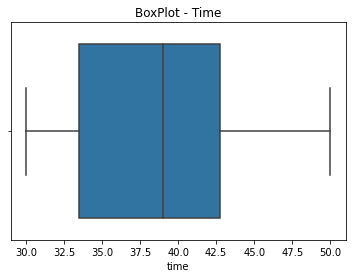

In [ ]:
#Boxplot
sns.boxplot(dframe['time'])
plt.title('BoxPlot - Time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BoxPlot - Number of Days')

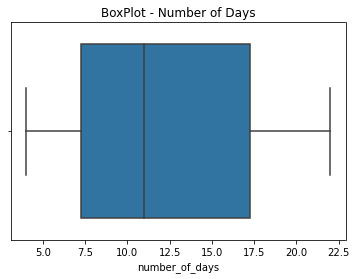

In [ ]:
sns.boxplot(dframe['number_of_days'])
plt.title('BoxPlot - Number of Days')

Text(0.5, 1.0, 'Histogram - Time')

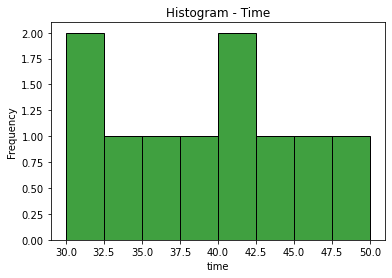

In [ ]:
sns.histplot(dframe['time'], bins=8, color='green')
plt.ylabel('Frequency')
plt.title('Histogram - Time')

Text(0.5, 1.0, 'Histogram - Number Of Days')

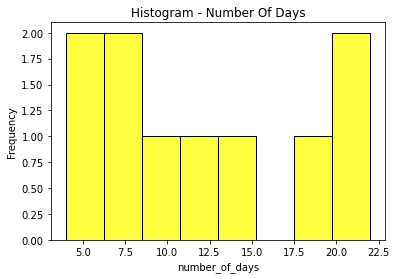

In [ ]:
sns.histplot(dframe['number_of_days'], bins=8, color='yellow')
plt.ylabel('Frequency')
plt.title('Histogram - Number Of Days')

# Exercise 15

## Importing Data

In [7]:
#Creating dict as shown by the author
dict_data_15 = {'classe':  ['30~60',
                        '60~90',
                        '90~120',
                        '120~150',
                        '150~180',
                        '180~210'],
              'F':        [11,
                          29,
                          41,
                          82,
                          54,
                          33],
             'F%':        [4.4,
                          11.6,
                          16.4,
                          32.8,
                          21.6,
                          13.2]}

#Creating dframe based on dict_data
dframe_15 = pd.DataFrame(dict_data_15)

In [8]:
dframe_15.to_csv('exercicio_15.csv',index=False)

In [ ]:
dframe_15.dtypes

classe     object
F           int64
F%        float64
dtype: object

In [ ]:
dframe_15

,classe,F,F%
0,30~60,11,4.4
1,60~90,29,11.6
2,90~120,41,16.4
3,120~150,82,32.8
4,150~180,54,21.6
5,180~210,33,13.2


## Answer for 15 - A

In [ ]:
dict_15a = {}
dict_15a['mean'] = dframe_15['F'].mean()
dict_15a['median'] = dframe_15['F'].median()
dict_15a['mode'] = dframe_15['F'].mode()

In [ ]:
dict_15a

{'mean': 41.666666666666664, 'median': 37.0, 'mode': 0    11
 1    29
 2    33
 3    41
 4    54
 5    82
 dtype: int64}

There is no Mode for F

## Answer for 15 - B

In [ ]:
dict_15b = {}
dict_15b['q1'] = dframe_15.F.quantile([0.25]).to_frame().loc[0.25]['F']
dict_15b['q3'] = dframe_15.F.quantile([0.75]).to_frame().loc[0.75]['F']
dict_15b['d2'] = dframe_15.F.quantile([0.20]).to_frame().loc[0.20]['F']
dict_15b['p13'] = dframe_15.F.quantile([0.13]).to_frame().loc[0.13]['F']
dict_15b['p95'] = dframe_15.F.quantile([0.95]).to_frame().loc[0.95]['F']

In [ ]:
dict_15b

{'d2': 29.0, 'p13': 22.700000000000003, 'p95': 75.0, 'q1': 30.0, 'q3': 50.75}

## Answer for 15 - C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


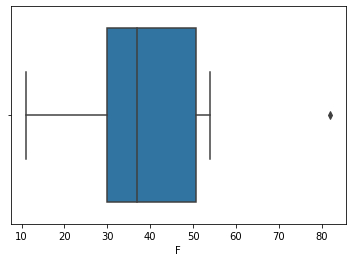

In [ ]:
sns.boxplot(dframe_15['F'])

Yes there is an outlier when frequency is higher than 80. 

## Answer for 15 - D

In [ ]:
dframe_15.describe()['F'].loc['std']

24.31186267373742

In [ ]:
dict_15d = {}
dict_15d['amplitude'] = dframe_15.describe()['F'].loc['max'] - dframe_15.describe()['F'].loc['min']
dict_15d['variance'] = s.variance(dframe_15['F'])
dict_15d['standard_deviation'] = dframe_15.describe()['F'].loc['std']
dict_15d['standard_error'] = scipy.stats.sem(dframe_15['F'])

In [ ]:
dict_15d

{'amplitude': 71.0,
 'standard_deviation': 24.31186267373742,
 'standard_error': 9.925276374545504,
 'variance': 591.0666666666667}

## Answer for 15 - E

In [ ]:
dict_15e = {}
dict_15e['skew'] = scipy.stats.skew(dframe_15['F'])
dict_15e['kurtosis'] = scipy.stats.kurtosis(dframe_15['F'])
dict_15e

{'kurtosis': -0.536959616647879, 'skew': 0.5483434876879687}

---
Distribution is assymetric positive (right) once skew > 0.

The curve is platykurtic once kurtosis < 0.

---

## Answer for 15 - F

Text(0, 0.5, 'Frequency')

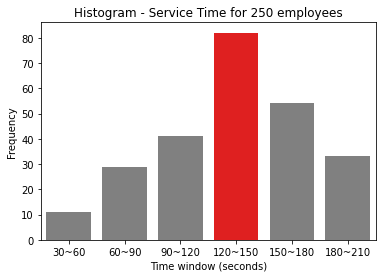

In [ ]:
clrs = ['grey' if (x < max(dframe_15['F'])) else 'red' for x in dframe_15['F']]
sns.barplot(x='classe',y='F',data=dframe_15, palette=clrs)
plt.title('Histogram - Service Time for 250 employees')
plt.xlabel('Time window (seconds)')
plt.ylabel('Frequency')

It is essential to understand which Time window sold more. Once the company is a retailer, customers that spend less than 120 seconds in the store can feel upset with something about layout, organization or noise and leave without buying anything. <br><br>
On the other hand, customers who spend more than 120 seconds in the store, could feel annoyed by the employee who have attended them and leave without buying anything.


# Exercise 16

## Importing Data

In [9]:
#Creating dict as shown by the author
dict_data = {'acao_A':[31,
30,
24,
24,
28,
22,
24,
34,
24,
28,
23,
30,
31,
32,
26,
39,
25,
42,
29,
24,
22,
23,
32,
29],
              'acao_B':[25,
33,
27,
34,
32,
26,
26,
28,
34,
28,
31,
28,
34,
16,
28,
29,
27,
28,
33,
29,
34,
33,
27,
26]}

#Creating dframe based on dict_data
dframe_16 = pd.DataFrame(dict_data)

In [10]:
dframe_16.to_csv('exercicio_16.csv',index=False)

In [ ]:
dframe_16

,acao_A,acao_B
0,31,25
1,30,33
2,24,27
3,24,34
4,28,32
5,22,26
6,24,26
7,34,28
8,24,34
9,28,28


## Answer for 16

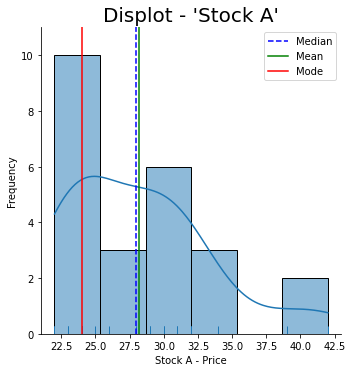

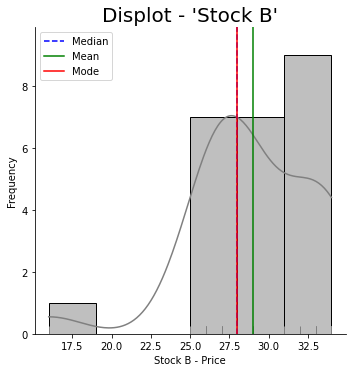

In [ ]:
%matplotlib inline
median_a = np.median(dframe_16['acao_A'])
mean_a = np.mean(dframe_16['acao_A'])
mode_a = dframe_16['acao_A'].mode().tolist()[0] 

sns.displot(dframe_16['acao_A'], kde=True, rug=True);
plt.axvline(median_a, color='b', linestyle='--', label='Median')
plt.axvline(mean_a, color='g', linestyle='-', label = 'Mean')
plt.axvline(mode_a, color='r', linestyle='-', label ='Mode')
plt.title("Displot - 'Stock A'",fontsize=20)
plt.ylabel("Frequency")
plt.xlabel("Stock A - Price")
plt.legend()
plt.show()

%matplotlib inline
median_b = np.median(dframe_16['acao_B'])
mean_b = np.mean(dframe_16['acao_B'])
mode_b = dframe_16['acao_B'].mode().tolist()[0] 

sns.displot(dframe_16['acao_B'], kde=True, rug=True, color='grey');
plt.axvline(median_b, color='b', linestyle='--', label='Median')
plt.axvline(mean_b, color='g', linestyle='-', label = 'Mean')
plt.axvline(mode_b, color='r', linestyle='-', label ='Mode')
plt.title("Displot - 'Stock B'",fontsize=20)
plt.ylabel("Frequency")
plt.xlabel("Stock B - Price")
plt.legend()
plt.show()

In [ ]:
dframe_16.describe()

,acao_A,acao_B
count,24.000000,24.00000
mean,28.166667,29.00000
std,5.222582,4.11783
min,22.000000,16.00000
25%,24.000000,27.00000
50%,28.000000,28.00000
75%,31.000000,33.00000
max,42.000000,34.00000


In [ ]:
#Skew
dict_skew = {}
dict_skew['skew_A'] = scipy.stats.skew(dframe_16['acao_A'])
dict_skew['skew_B'] = scipy.stats.skew(dframe_16['acao_B'])
dict_skew

{'skew_A': 0.9790806261395322, 'skew_B': -1.0457082239213267}

In [ ]:
#Kurtosis
dict_kurtosis = {}
dict_kurtosis['kurt_A'] = scipy.stats.kurtosis(dframe_16['acao_A'])
dict_kurtosis['kurt_B'] = scipy.stats.kurtosis(dframe_16['acao_B'])
dict_kurtosis

{'kurt_A': 0.5420579323554096, 'kurt_B': 2.124733727810651}

Until now we know that:<br>


*   Stock A and B had the same mean over the period
*   Their quartiles look the same too
*   Stock A is skewed right, which indicates a upward trend
*   Stock B is skwewed left, which indicates a downward trend
*   Both stock prices are not normal distributed
*   Both stock prices are leptokurtic, but stock B is much more than A




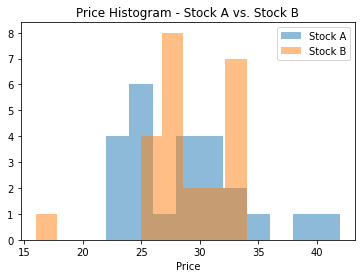

In [ ]:
# Creating a histogram - overlaying A/B
plt.hist('acao_A', data=dframe_16, alpha=0.5, label='Stock A');
plt.hist('acao_B', data=dframe_16, alpha=0.5, label='Stock B');
plt.title('Price Histogram - Stock A vs. Stock B');
plt.xlabel('Price');
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


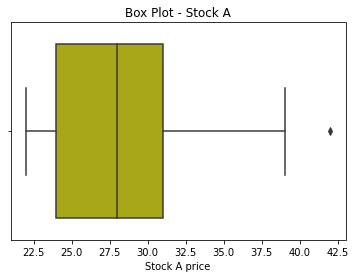

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


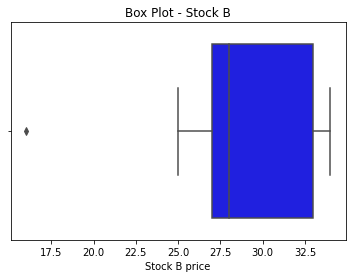

In [ ]:
#Checking outliers
sns.boxplot(dframe_16['acao_A'],color='y')
plt.title('Box Plot - Stock A')
plt.xlabel('Stock A price')
plt.show()

sns.boxplot(dframe_16['acao_B'],color='b')
plt.title('Box Plot - Stock B')
plt.xlabel('Stock B price')
plt.show()



*   Outlier for Stock A occured above 40.
*   Outlier for Stock B occured less than 17.



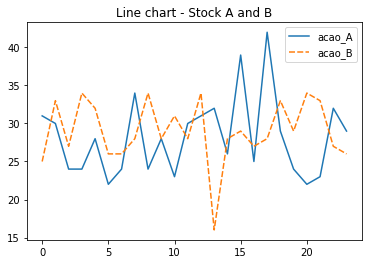

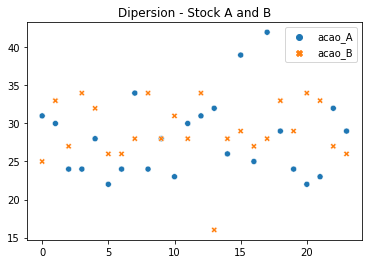

In [ ]:
#Line Chart
sns.lineplot(data=dframe_16)
plt.title('Line chart - Stock A and B')
plt.show()

sns.scatterplot(data=dframe_16)
plt.title('Dipersion - Stock A and B')
plt.show()

Text(0.5, 1.0, 'Stemgraphic - Stock B')

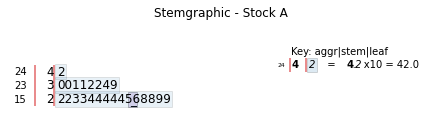

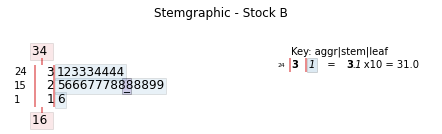

In [ ]:
#Stemgraphic A
stemgraphic.stem_graphic(dframe_16['acao_A'], scale = 10)
plt.title('Stemgraphic - Stock A')
#Stemgraphic B
stemgraphic.stem_graphic(dframe_16['acao_B'], scale = 10)
plt.title('Stemgraphic - Stock B')



*   Stock A never reached less than 20, while Stock B reached 16.
*   Stock A and B were almost all the time between 20 and 35.
*   Stock A reached maximum above 40.



# Exercise 17

## Importing Data

In [11]:
#Creating dict as shown by the author
dict_data_17 = {'hospital':['A',
'B',
'E',
'D',
'E',
'F',
'G',
'H',
'I',
'J',
'K',
'L',
'M',
'N',
'O'],
              'investment':[44,
12,
6,
22,
60,
15,
30,
200,
10,
8,
4,
75,
180,
50,
64]}

#Creating dframe based on dict_data
dframe_17 = pd.DataFrame(dict_data_17)

In [12]:
dframe_17.to_csv('exercicio_17.csv',index=False)

In [ ]:
dframe_17.describe()

,investment
count,15.000000
mean,52.000000
std,60.690079
min,4.000000
25%,11.000000
50%,30.000000
75%,62.000000
max,200.000000


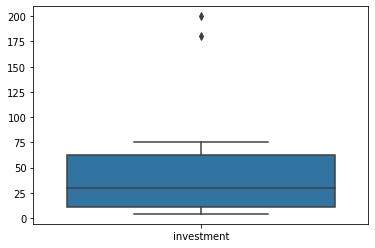

In [ ]:
sns.boxplot(data=dframe_17)

In [ ]:
dframe_17_no_outliers = dframe_17.query("investment<=175")

In [ ]:
dframe_17_no_outliers.describe()

,investment
count,13.000000
mean,30.769231
std,24.863473
min,4.000000
25%,10.000000
50%,22.000000
75%,50.000000
max,75.000000


As the outliers were higher than the mean, without them standard deviation is smaller.